# Trabalho IV - Aprendizado de Máquina com microarrays
Leonardo Azzi Martins

INF05018 - Biologia Computacional

---

# Setup

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd # manipulação de datasets
import numpy as np  # operações matemáticas 

# sklearn é uma biblioteca de data science e machine learning
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import silhouette_score


# biblioteca para visualização
import matplotlib.pyplot as plt
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

Definir o nome do arquivo de dados que usaremos

In [5]:
file_name = 'Prostate_GSE6919_U95B.csv' # https://sbcb.inf.ufrgs.br/cumida

In [6]:
data = pd.read_csv(file_name, delimiter=',', header=0, index_col=0) 
data

,type,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,41888_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM152992.CEL,primary_prostate_tumor,2.414076,4.113824,2.035911,3.102248,2.115578,1.775455,6.107839,2.160168,3.363597,...,2.955998,2.910953,2.095267,1.617076,2.060144,1.962483,1.919590,2.034229,3.013061,2.208421
GSM152993.CEL,primary_prostate_tumor,2.385157,4.078664,2.123064,3.087631,2.254190,1.815183,5.708878,2.134447,3.336872,...,3.196521,2.975412,2.249950,1.757867,2.352185,2.054990,1.970140,1.768459,4.701207,2.513560
GSM152994.CEL,primary_prostate_tumor,2.295522,4.085505,2.144344,3.071539,2.229422,1.985899,5.679248,2.100443,3.356141,...,2.929904,2.857025,2.047436,1.625339,2.065674,1.955286,1.768858,1.666836,3.115166,2.136760
GSM152995.CEL,primary_prostate_tumor,2.260478,4.466391,2.206410,3.505265,2.605014,1.887307,5.935039,2.261295,3.754584,...,3.578538,3.420946,2.736342,1.940826,2.713500,2.363843,2.194837,1.981020,3.141350,2.550041
GSM152996.CEL,primary_prostate_tumor,2.229731,4.291435,2.506255,3.220628,2.404673,1.886664,5.965917,2.274317,3.450538,...,3.558184,3.083316,2.562048,1.923414,2.775842,2.323899,2.288732,2.772796,2.848256,2.803264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM153233.CEL,normal,2.305050,4.095951,1.892349,3.097484,2.231303,1.971964,5.598093,2.092084,3.187975,...,3.521292,3.091387,2.234156,1.774587,2.496925,2.340286,2.058535,2.146309,3.093957,2.440654
GSM153234.CEL,normal,2.405650,4.083099,1.828318,2.987580,2.159251,2.086542,5.566386,1.968839,3.226227,...,3.375090,3.122058,2.277573,1.922329,2.475973,2.177743,1.813374,1.917204,2.395584,2.100605
GSM153235.CEL,normal,2.456738,4.121602,1.972852,3.057921,2.115119,1.863530,5.886834,2.105358,3.249482,...,3.338930,3.205037,2.151657,1.891080,2.438726,2.292233,2.253969,2.145971,4.231840,2.806621


# EDA

In [7]:
data.describe()

,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,41888_at,41889_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2.502464,4.166458,1.994689,3.163871,2.254477,1.995747,5.891606,2.133061,3.296258,3.014616,...,3.249328,3.080706,2.231826,1.825478,2.386984,2.208393,2.119095,2.129572,3.391223,2.586230
std,0.143348,0.130313,0.159770,0.160648,0.162345,0.143794,0.216784,0.136629,0.187083,0.167731,...,0.272209,0.228980,0.247075,0.218785,0.257512,0.296511,0.355673,0.446850,0.959069,0.580451
min,2.185090,3.889521,1.633173,2.722558,1.943469,1.767546,5.361032,1.865628,2.887711,2.516458,...,2.559375,2.569864,1.753865,1.396211,1.819220,1.577778,1.518746,1.497803,2.083887,1.645709
25%,2.416656,4.087583,1.881999,3.075074,2.160879,1.887146,5.742641,2.029198,3.170294,2.917308,...,3.062672,2.920232,2.077594,1.688504,2.207988,1.999881,1.913692,1.836352,2.657558,2.228996
50%,2.504266,4.146306,1.962583,3.149837,2.230363,1.979415,5.874833,2.117959,3.264642,3.015975,...,3.265123,3.069318,2.232301,1.815985,2.385257,2.229064,2.074915,2.080756,3.112597,2.521655
75%,2.594960,4.250945,2.105921,3.249132,2.340170,2.090395,5.987802,2.241839,3.407955,3.121913,...,3.404703,3.220453,2.376157,1.933124,2.557671,2.365336,2.257700,2.284928,3.955935,2.822552
max,2.861795,4.613252,2.506255,3.688947,2.878543,2.472451,6.656748,2.603843,3.814962,3.417583,...,3.936319,3.681312,3.074330,2.956384,3.359665,3.226926,3.826599,4.171034,6.826491,5.696315


In [8]:
# para obtermos uma lista com os identificadores das classes:
classes = data['type'].unique()
classes

array(['primary_prostate_tumor', 'normal'], dtype=object)

In [9]:
data.dtypes

type                     object
41880_at                float64
41881_at                float64
41882_at                float64
41883_at                float64
                         ...   
AFFX-TrpnX-M_at         float64
AFFX-YEL002c/WBP1_at    float64
AFFX-YEL018w/_at        float64
AFFX-YEL021w/URA3_at    float64
AFFX-YEL024w/RIP1_at    float64
Length: 12621, dtype: object

# Pré-processamento

## Transforma type (categórico) em code (numérico)

In [10]:
data.type = pd.Categorical(data.type)
data['code'] = data.type.cat.codes 


In [11]:
data[['type', 'code']]

,type,code
samples,,
GSM152992.CEL,primary_prostate_tumor,1
GSM152993.CEL,primary_prostate_tumor,1
GSM152994.CEL,primary_prostate_tumor,1
GSM152995.CEL,primary_prostate_tumor,1
GSM152996.CEL,primary_prostate_tumor,1
...,...,...
GSM153233.CEL,normal,0
GSM153234.CEL,normal,0
GSM153235.CEL,normal,0


In [12]:
# atualiza classes
classes = data['code'].unique()
classes

array([1, 0], dtype=int8)

In [13]:
data = data.drop('type', axis=1)
data

,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,41888_at,41889_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,code
samples,,,,,,,,,,,,,,,,,,,,,
GSM152992.CEL,2.414076,4.113824,2.035911,3.102248,2.115578,1.775455,6.107839,2.160168,3.363597,3.155905,...,2.910953,2.095267,1.617076,2.060144,1.962483,1.919590,2.034229,3.013061,2.208421,1
GSM152993.CEL,2.385157,4.078664,2.123064,3.087631,2.254190,1.815183,5.708878,2.134447,3.336872,2.863654,...,2.975412,2.249950,1.757867,2.352185,2.054990,1.970140,1.768459,4.701207,2.513560,1
GSM152994.CEL,2.295522,4.085505,2.144344,3.071539,2.229422,1.985899,5.679248,2.100443,3.356141,2.819615,...,2.857025,2.047436,1.625339,2.065674,1.955286,1.768858,1.666836,3.115166,2.136760,1
GSM152995.CEL,2.260478,4.466391,2.206410,3.505265,2.605014,1.887307,5.935039,2.261295,3.754584,2.994412,...,3.420946,2.736342,1.940826,2.713500,2.363843,2.194837,1.981020,3.141350,2.550041,1
GSM152996.CEL,2.229731,4.291435,2.506255,3.220628,2.404673,1.886664,5.965917,2.274317,3.450538,3.309058,...,3.083316,2.562048,1.923414,2.775842,2.323899,2.288732,2.772796,2.848256,2.803264,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM153233.CEL,2.305050,4.095951,1.892349,3.097484,2.231303,1.971964,5.598093,2.092084,3.187975,3.038651,...,3.091387,2.234156,1.774587,2.496925,2.340286,2.058535,2.146309,3.093957,2.440654,0
GSM153234.CEL,2.405650,4.083099,1.828318,2.987580,2.159251,2.086542,5.566386,1.968839,3.226227,2.904245,...,3.122058,2.277573,1.922329,2.475973,2.177743,1.813374,1.917204,2.395584,2.100605,0
GSM153235.CEL,2.456738,4.121602,1.972852,3.057921,2.115119,1.863530,5.886834,2.105358,3.249482,2.964812,...,3.205037,2.151657,1.891080,2.438726,2.292233,2.253969,2.145971,4.231840,2.806621,0


In [14]:
# para obtermos a média do valor de expressão gênica de cada gene (coluna):
avg = data.mean()
print(avg)

41880_at                2.502464
41881_at                4.166458
41882_at                1.994689
41883_at                3.163871
41884_at                2.254477
                          ...   
AFFX-YEL002c/WBP1_at    2.119095
AFFX-YEL018w/_at        2.129572
AFFX-YEL021w/URA3_at    3.391223
AFFX-YEL024w/RIP1_at    2.586230
code                    0.516129
Length: 12621, dtype: float64


Separa atributos em X e rótulos/classes em Y

In [15]:
Y = data['code']
X = data.drop('code', axis=1)
print(X)
print(Y)

               41880_at  41881_at  41882_at  41883_at  41884_at  41885_at  \
samples                                                                     
GSM152992.CEL  2.414076  4.113824  2.035911  3.102248  2.115578  1.775455   
GSM152993.CEL  2.385157  4.078664  2.123064  3.087631  2.254190  1.815183   
GSM152994.CEL  2.295522  4.085505  2.144344  3.071539  2.229422  1.985899   
GSM152995.CEL  2.260478  4.466391  2.206410  3.505265  2.605014  1.887307   
GSM152996.CEL  2.229731  4.291435  2.506255  3.220628  2.404673  1.886664   
...                 ...       ...       ...       ...       ...       ...   
GSM153233.CEL  2.305050  4.095951  1.892349  3.097484  2.231303  1.971964   
GSM153234.CEL  2.405650  4.083099  1.828318  2.987580  2.159251  2.086542   
GSM153235.CEL  2.456738  4.121602  1.972852  3.057921  2.115119  1.863530   
GSM153236.CEL  2.306891  3.990915  2.018053  3.038294  2.338770  1.925691   
GSM153237.CEL  2.499361  4.129915  2.016119  3.121170  2.344369  1.915144   

# a. Normalização com z-score

a. Dados brutos não são a melhor opção para descobertas biológicas devido à presença de ruído e variações entre as diferentes tecnologias envolvidas. Por conta disso, se faz necessária a aplicação de técnicas de Correção de background; Transformação de dados; Normalização de dados; e Validação estatística. A normalização dos dados consiste em transformar os valores obtidos de modo que as variações de um experimento sejam reduzidas permitindo que duas amostras sejam apropriadamente comparadas. Para certas tarefas, como classificação e clustering, às vezes é necessário reescalar ou normalizar os dados para que todas as colunas tenham o mesmo "peso" ou certos intervalos de valores sejam obedecidos. Realize a normalização do dataset de estudo utilizando o z-score:  z=(x-\mu)/\sigma (x = valor observado; \mu=  valor médio da variável; \sigma = desvio padrão da variável). Para este item é necessário apresentar o código fonte utilizado para normalizar os dados;

In [16]:
X = X.apply(scipy.stats.zscore)
X

,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,41888_at,41889_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM152992.CEL,-0.619096,-0.405540,0.259055,-0.385145,-0.859048,-1.538211,1.001509,0.199202,0.361397,0.845773,...,-1.081964,-0.744348,-0.554944,-0.956410,-1.274368,-0.832710,-0.563196,-0.214233,-0.395901,-0.653529
GSM152993.CEL,-0.821660,-0.676450,0.806757,-0.476498,-0.001771,-1.260806,-0.846326,0.010188,0.217971,-0.903674,...,-0.194782,-0.461702,0.073654,-0.310282,-0.135681,-0.519461,-0.420496,-0.811409,1.371432,-0.125703
GSM152994.CEL,-1.449493,-0.623741,0.940487,-0.577074,-0.154954,-0.068768,-0.983561,-0.239701,0.321385,-1.167295,...,-1.178212,-0.980817,-0.749317,-0.918485,-1.252804,-0.857082,-0.988710,-1.039753,-0.289006,-0.777487
GSM152995.CEL,-1.694949,2.310967,1.330536,2.133727,2.167972,-0.757192,0.201165,0.942365,2.459783,-0.120944,...,1.214307,1.491921,2.050242,0.529361,1.273109,0.526392,0.213818,-0.333791,-0.261595,-0.062599
GSM152996.CEL,-1.910314,0.962945,3.214879,0.354737,0.928922,-0.761683,0.344178,1.038059,0.828000,1.762560,...,1.139230,0.011446,1.341952,0.449454,1.516183,0.391130,0.478883,1.445303,-0.568437,0.375424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM153233.CEL,-1.382754,-0.543249,-0.643144,-0.414918,-0.143320,-0.166066,-1.359435,-0.301134,-0.581146,0.143878,...,1.003152,0.046835,0.009472,-0.233551,0.428669,0.446620,-0.170958,0.037608,-0.311210,-0.251815
GSM153234.CEL,-0.678116,-0.642279,-1.045538,-1.101820,-0.588946,0.633981,-1.506290,-1.206838,-0.375853,-0.660692,...,0.463877,0.181328,0.185909,0.444475,0.346975,-0.103789,-0.863041,-0.477184,-1.042343,-0.840027
GSM153235.CEL,-0.320278,-0.345616,-0.137230,-0.662188,-0.861890,-0.923216,-0.022102,-0.203585,-0.251045,-0.298132,...,0.330502,0.545180,-0.325786,0.301065,0.201746,0.283903,0.380747,0.036847,0.880048,0.381230


# b. Divisão de dados

b. Para avaliar um classificador, é necessário dividir os dados em pelo menos 2 conjuntos: conjunto de treinamento e conjunto de teste. Uma divisão comum seria 70% treinamento, 30% teste. Os dados no conjunto de teste devem sempre estar ocultos do classificador durante o treinamento. O ideal nesta divisão é que ocorra uma amostragem estratificada, isto é, que a proporção entre classes seja a mesma em todos os subconjuntos. Realize a divisão do dataset de estudo (resultante da letra 'a') em conjunto de teste e conjunto de treinamento de forma a contemplar o conceito de amostragem estratificada. Para este item é necessário apresentar o código fonte utilizado para divisão dos dados em conjunto de treinamente e conjunto de teste.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (86, 12620)
Tamanho do conjunto de teste: (38, 12620)


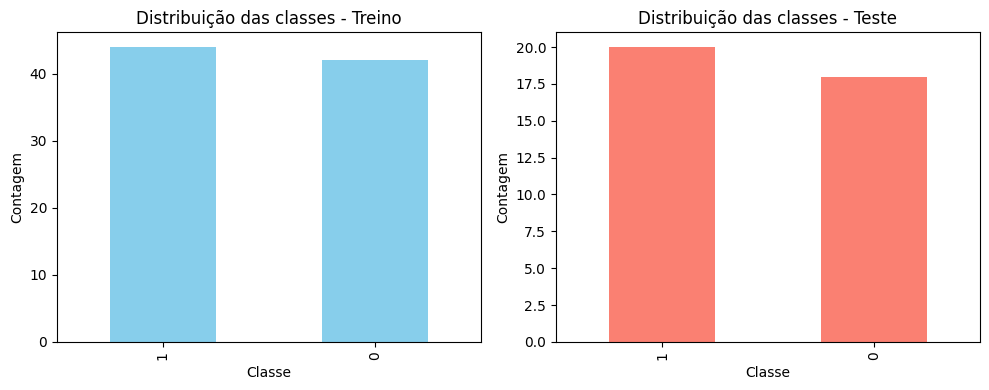

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# treino
Y_train.value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição das classes - Treino')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Contagem')

# teste
Y_test.value_counts().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Distribuição das classes - Teste')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

# c. Classificação com SVM

c. Em tarefas de classificação, o objetivo é mapear um padrão de entrada para uma saída específica. Existem muitas opções de classificadores e cada uma tem suas particularidades. Support Vector Machine (SVM) é um dos algoritmos com melhor desempenho na classificação de dados de microarranjo segundo a literatura. Fazendo uso de bibliotecas (por exemplo, scikit-learn https://scikit-learn.org/stable) crie um classificador SVM para o dataset de estudo. O treinamento do classificador deve ser realizada com base no grupo de treinamento criado no item 'b'. Para este item é necessário apresentar o código fonte utilizado para a criação do classificador.

In [19]:
# https://scikit-learn.org/stable/modules/svm.html
clf = svm.SVC()
clf.fit(X, Y)

prediction = clf.predict(X)
print(prediction) # mostra as classes preditas para X pelo modelo em clf

cm = confusion_matrix(Y, prediction, labels=classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


# d. Métricas de avaliação

d. Métricas em Aprendizado de Máquina estão relacionadas aos aspectos de uma predição. Algumas métricas podem indicar propriedades discriminativas, enquanto outras se relacionam com habilidade preditiva. Nem todas são adequadas para diagnóstico devido ao desequilíbrio entre classes. A partir criado na letra 'c' e do cojunto de testes, avalie o classificador considerando as seguintes métricas: (i) a matriz de confusão; (ii) a acurácia; (iii) Sensitivity; (iv) Specificity; e (v) F1-score. O valor destas métricas deve ser reportado. Ao analisar as métricas você considera que o classificador teve um desempenho adequado?

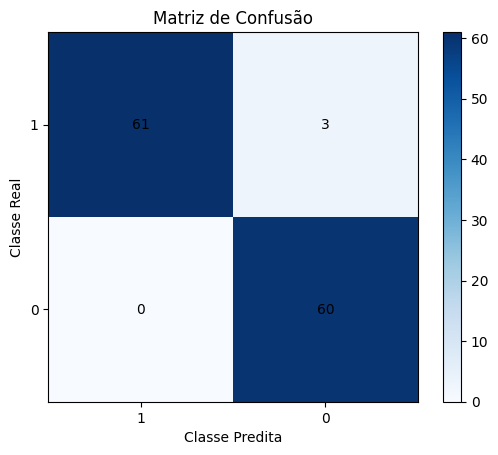

Acurácia: 0.9758064516129032
Sensitivity (Recall): 1.0
Specificity: 0.953125
F1-score: 0.976


In [20]:
# (i) Matriz de confusão
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

ax.set_xlabel('Classe Predita')
ax.set_ylabel('Classe Real')
ax.set_title('Matriz de Confusão')
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

for i in range(cm.shape[0]): # Adicionar valores nas células
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im)
plt.show()

# (ii) Acurácia
accuracy = accuracy_score(Y, prediction)
print("Acurácia:", accuracy)

# (iii) Sensitivity
TP = cm[1, 1]
FN = cm[1, 0]
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# (iv) Specificity
TN = cm[0, 0]
FP = cm[0, 1]
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# (v) F1-score (para classe positiva)
f1 = f1_score(Y, prediction, pos_label=1)
print("F1-score:", f1)

**Ao analisar as métricas você considera que o classificador teve um desempenho adequado?**

R: Sim, pois as métricas são bastante robustas. O único ponto de atenção, dado o contexto de predição para câncer de próstata, é que falso-negativos podem ser "mais graves" do que falso-positivos, pois pode resultar em uma sub-notificação de uma doença que precisa de tratamento rápido e intensivo.

# e. Análise com K-means

e. Técnicas de clusterização podem ser utilizadas para descobrir novos grupos de amostras a partir do conjunto de dados. k-means é um método de clustering que objetiva particionar n observações dentre k grupos onde cada observação pertence ao grupo mais próximo da média. Fazendo uso de bibliotecas (por exemplo, scikit-learn https://scikit-learn.org/stable) utilize o método k-means para analisar o dataset de estudo (preparado no item 'a') considerando os seguintes cenários: existência de 2 grupos; 3 grupos e 4 grupos. Para cada um dos cenários reporte o número de amostras presentes de cada grupo.

K-means com 2 grupos

[1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Silhouette Score (2 clusters): 0.085
Cluster 0: 25 amostras
Cluster 1: 99 amostras


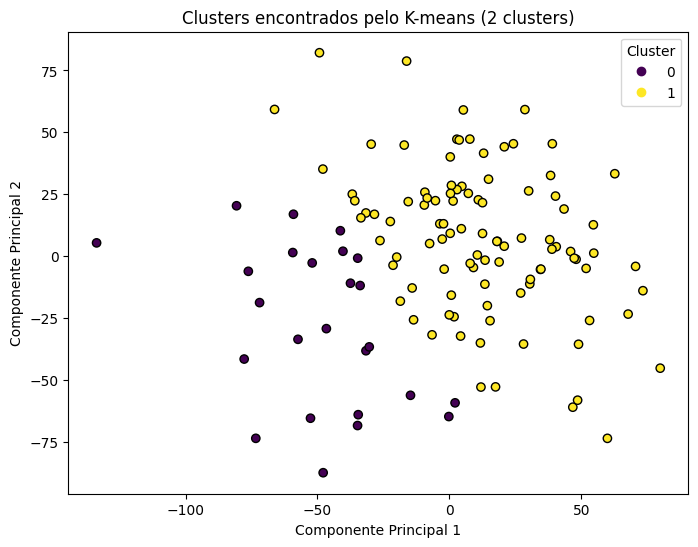

K-means com 3 grupos

[1 1 1 0 0 0 0 0 0 1 2 0 2 1 0 1 1 1 0 1 2 2 2 2 0 2 2 1 1 2 2 2 2 1 1 2 2
 1 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 1 1 2 2 0 2 2 2 1 1 2 2 0 0 2 1 1 1
 2 2 2 0 1 1 2 2 1 1 2 2 2 2 1 1 2 1 1 1 1 2 2 2 2 2 1 1 1 2 2 2 2 2 2 1 2
 2 1 2 1 1 1 2 2 1 1 1 1 1]
Silhouette Score (3 clusters): 0.058
Cluster 0: 14 amostras
Cluster 1: 47 amostras
Cluster 2: 63 amostras


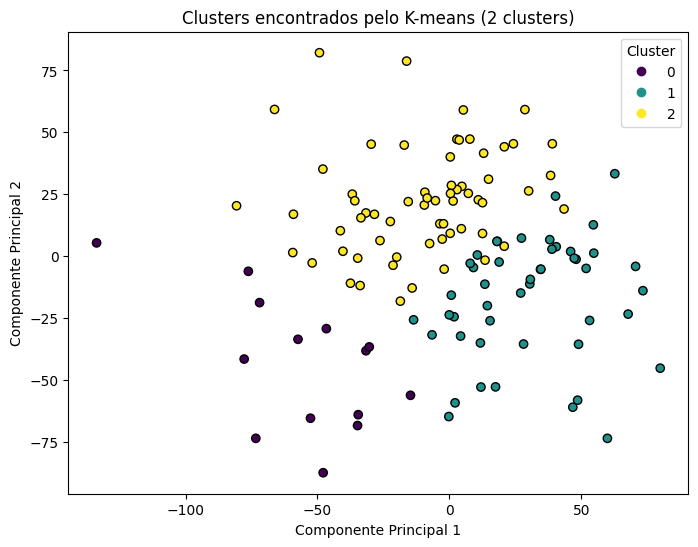

K-means com 4 grupos

[3 3 3 0 0 0 0 0 0 0 2 0 3 3 1 3 3 0 0 3 2 2 2 1 1 1 1 3 3 2 1 2 2 3 3 2 2
 3 2 2 2 2 3 2 2 3 1 1 3 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 3 3 1 1 0 0 1 3 3 3
 1 1 1 0 3 3 2 2 3 3 2 2 1 1 1 3 2 3 3 3 3 3 2 2 2 2 3 3 3 2 2 2 2 2 2 3 1
 2 3 1 3 3 3 1 1 3 3 3 3 3]
Silhouette Score (4 clusters): 0.061
Cluster 0: 13 amostras
Cluster 1: 34 amostras
Cluster 2: 31 amostras
Cluster 3: 46 amostras


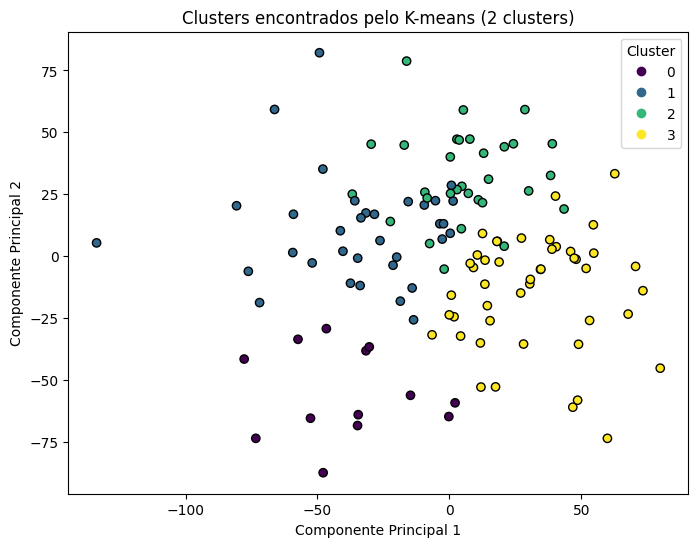

In [29]:
grupos = [2, 3, 4]

for n_grupos in grupos:
    print(f"K-means com {n_grupos} grupos\n====================================================================================================\n")
    kmeans = KMeans(n_clusters=n_grupos, random_state=0).fit(X)
    clusters = kmeans.predict(X) 
    print(clusters)

    # Silhouette Score (quanto maior, melhor a separação dos clusters; varia de -1 a 1)
    sil_score = silhouette_score(X, clusters)
    print(f"Silhouette Score ({n_grupos} clusters): {sil_score:.3f}")

    # Contagem de amostras por cluster
    unique, counts = np.unique(clusters, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        print(f"Cluster {cluster_id}: {count} amostras")

    # Visualização dos clusters usando PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title(f'Clusters encontrados pelo K-means ({2} clusters)')
    plt.legend(*scatter.legend_elements(), title="Cluster")
    plt.show()

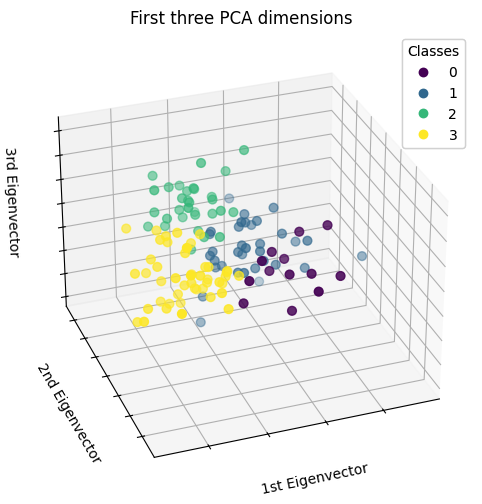

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=clusters,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    [0,1,2,3],
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

## Visualizando o PCA para os rótulos em Y

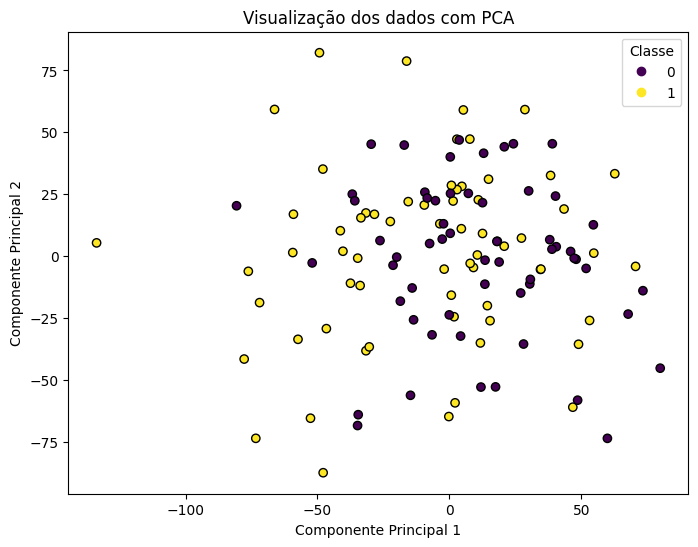

In [ ]:
# Reduzindo para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização dos dados com PCA')
plt.legend(*scatter.legend_elements(), title="Classe")
plt.show()

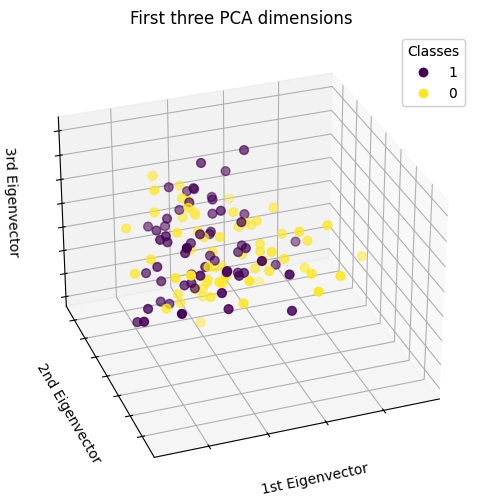

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=Y,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    classes,
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

## Visualizando o PCA para os rótulos Y_pred

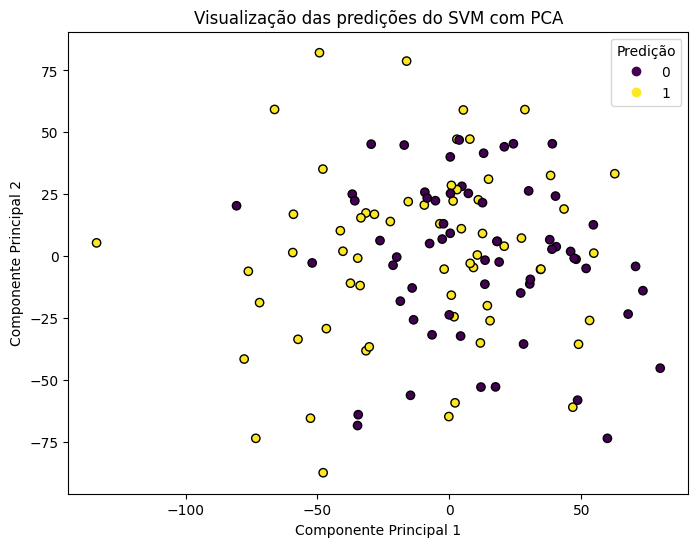

In [ ]:
# Visualização das predições do classificador SVM usando PCA
plt.figure(figsize=(8, 6))
scatter_pred = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=prediction, cmap='viridis', edgecolor='k')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualização das predições do SVM com PCA')
plt.legend(*scatter_pred.legend_elements(), title="Predição")
plt.show()

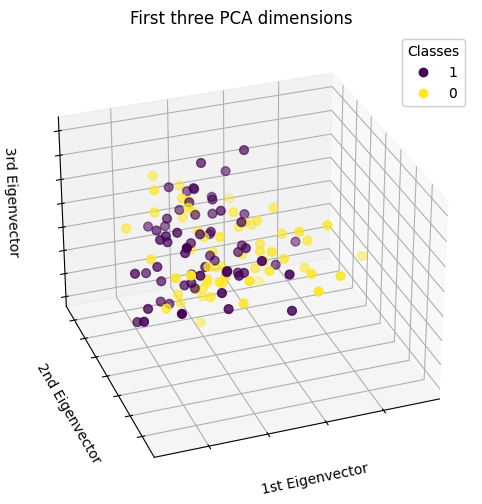

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=prediction,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    classes,
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()